In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 
load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 save_dataframes	 store_objects	 
sys	 


In [2]:

# From https://www.heritage.org/index/ranking
file_name = r'../data/html/capitalism_by_country.html'
capitalism_df = pd.read_html(file_name)[0]
capitalism_df.columns = ['Rank', 'Country', 'Overall Capitalism', 'Change']
capitalism_df.sample(10).T

,155,159,18,30,116,110,164,55,40,146
Rank,156,158,13,19,105,102,161,75,38,120
Country,Angola,Togo,Netherlands,Sweden,Cambodia,South Africa,Central African Republic,Morocco,Saint Lucia,Guinea
Overall Capitalism,50.6,50.3,76.8,75.2,57.8,58.3,49.1,62.9,68.7,55.7
Change,2,2.5,0.6,-1.1,-0.9,-4.7,-0.1,1,1.1,3.5


In [3]:

# From https://en.wikipedia.org/wiki/List_of_countries_by_income_equality
file_name = r'../data/html/income_inequality_by_country.html'
income_inequality_df = pd.read_html(file_name)[0]
income_inequality_df.sample(10).T

,91,109,44,8,117,84,137,87,7,54
Country,Libya,Morocco,Ecuador,Azerbaijan,Niger,Kuwait,Seychelles,Latvia,Austria,Gabon
UN R/P 10%,NaN,11.7,35.2,9.7,46,NaN,NaN,11.6,6.9,NaN
UN R/P 20%,NaN,7.4,10.7,2.3,5.4,NaN,9.8,5.8,4.9,8.4
World Bank Gini %,NaN,40.7,45,31.8,34,NaN,46.8,35.1,30.5,38
World Bank Gini Year,NaN,2007,2016,2008,2014,NaN,2013,2014,2014,2017
CIA R/P 10%,NaN,11.9,17.5,9.5,44.3,NaN,NaN,11.6,6.8,NaN
CIA R/P Year,NaN,1999,2006 Oct.,2001,1995,NaN,NaN,2003,2004,NaN
CIA Gini %,NaN,40.9,48.5,33.7,34,NaN,NaN,35.2,26.3,NaN
CIA Gini Year,NaN,2007 est.,2013 Dec.,2008,2007,NaN,NaN,2010,2007,NaN


In [4]:

capitalism_country_list = capitalism_df['Country'].tolist()
len(capitalism_country_list)

182

In [5]:

income_inequality_country_list = income_inequality_df['Country'].tolist()
len(income_inequality_country_list)

178

In [6]:

common_country_list = list(set.intersection(set(capitalism_country_list),
                                            set(income_inequality_country_list)))
len(common_country_list)

162

In [7]:

merge_df = pd.merge(left=capitalism_df, right=income_inequality_df, how='inner', on=['Country'],
                    suffixes=('_capitalism', '_income_inequality'))
merge_df.sample(10).T

,16,117,44,130,79,3,93,146,4,94
Rank,12,113,42,120,62,5,99,171,3,131
Country,United States,Guyana,Romania,Guinea,Portugal,Australia,Namibia,Algeria,New Zealand,Pakistan
Overall Capitalism,76.8,56.8,68.6,55.7,65.3,80.9,58.7,46.2,84.4,55
Change,1.1,-1.9,-0.8,3.5,1.9,0,0.2,1.5,0.2,0.6
UN R/P 10%,18.5,NaN,7.5,10.5,15,12.5,106.6,9.6,12.4,6.5
UN R/P 20%,9.4,NaN,4.3,5.5,6.4,5.8,20.1,4,NaN,4.4
World Bank Gini %,41.5,44.5,27.5,33.7,35.6,34.7,59.1,27.6,NaN,30.7
World Bank Gini Year,2016,1998,2013,2012,2014,2010,2015,2011,NaN,2013
CIA R/P 10%,14,26,7.4,21.6,9.2,12.7,129,9.6,NaN,6.6
CIA R/P Year,2014 est.,1999,2003,2006,1995 est.,1994,2003,1995,NaN,2002


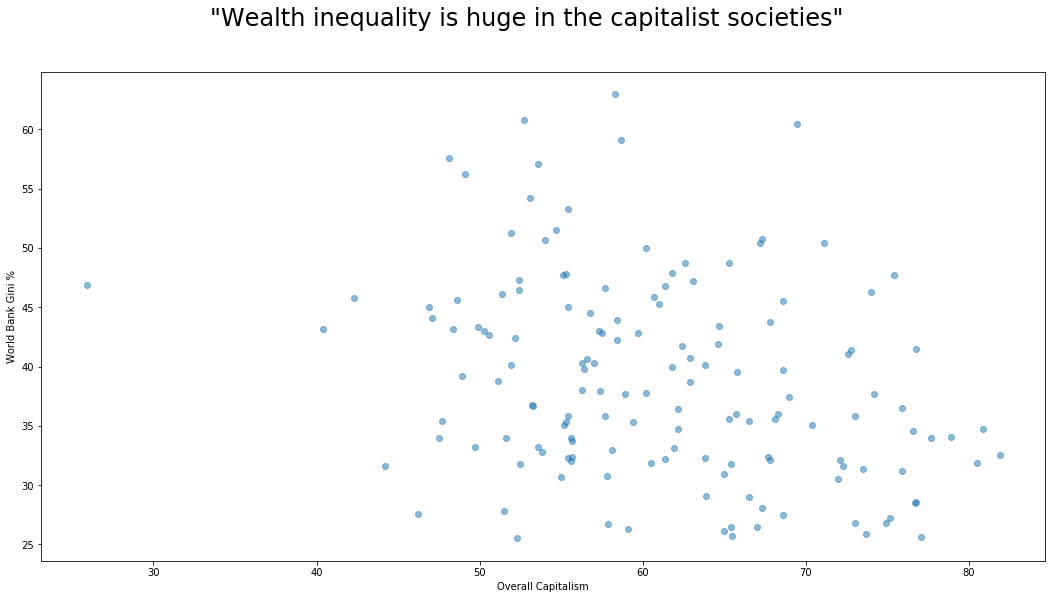

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 9))

# Explanatory variable
xname = 'Overall Capitalism'
xlabel_text = plt.xlabel(xname)

# Response variable
yname = 'World Bank Gini %'
ylabel_text = plt.ylabel(yname)

# Remove NaNs
columns_list = ['Country', xname, yname]
df = merge_df[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

path_collection = plt.scatter(xdata, ydata, alpha=0.5)
title_obj = fig.suptitle('"Wealth inequality is huge in the capitalist societies"',
                         fontsize=24)

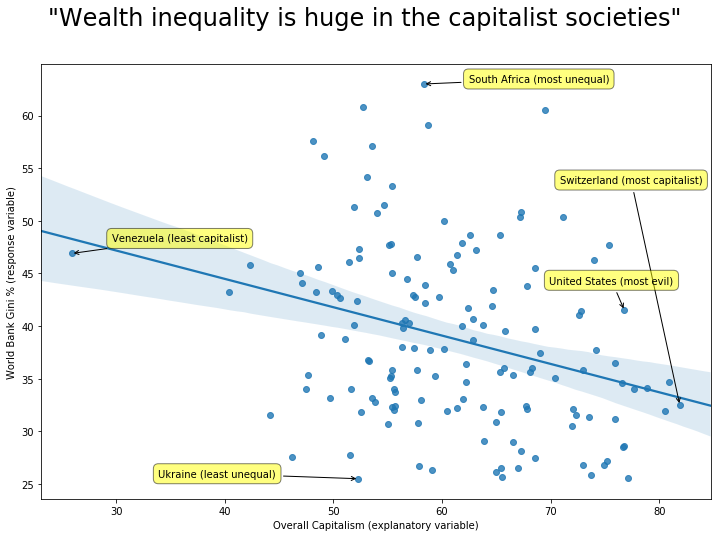

In [14]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'World Bank Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(40, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-120, 220), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(45, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-200, 0), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_obj = fig1_fig.suptitle('"Wealth inequality is huge in the capitalist societies"',
                              fontsize=24)

In [15]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline


In [53]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [54]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))